<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [67]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.4
    Uninstalling yfinance-0.2.4:
      Successfully uninstalled yfinance-0.2.4

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████

In [68]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [69]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [70]:
import yfinance as yf
import pandas as pd
Tesla=yf .Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [88]:
Tesla_data = Tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [92]:
# Reset the index of the tesla_data DataFrame
Tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(Tesla_data.head())


   index                      Date      Open      High       Low     Close  \
0      0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1      1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2      2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3      3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4      4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [73]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

Parse the html data using `beautiful_soup`.


In [74]:
import requests

# 定义要下载的网页URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# 使用requests库发送GET请求获取网页内容
response = requests.get(url)

# 检查响应状态码，确保请求成功
if response.status_code == 200:
    # 将网页内容保存到html_data变量中
    html_data = response.text
    print("网页内容已成功保存到html_data变量中")
else:
    print("请求失败，状态码:", response.status_code)


网页内容已成功保存到html_data变量中


In [75]:
from bs4 import BeautifulSoup
import pandas as pd

# 使用BeautifulSoup解析HTML
soup = BeautifulSoup(html_data, 'html.parser')

# 找到包含Tesla Revenue数据的表格
table = soup.find('table')

# 提取表格数据并创建DataFrame
data = []
for row in table.find_all('tr')[1:]:  # 从第二行开始，第一行通常是表头
    columns = row.find_all('td')
    if len(columns) == 2:  # 确保有两列数据
        date = columns[0].get_text()
        revenue = columns[1].get_text()
        data.append([date, revenue])

# 创建DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# 打印DataFrame的前几行
print(tesla_revenue.head())


   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


Execute the following lines to remove an null or empty strings in the Revenue column.


In [79]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [80]:
# Display the last 5 rows of the DataFrame
last_5_rows = tesla_revenue.tail(5)
print(last_5_rows)


    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [81]:

import yfinance as yf

gme_ticker = yf.Ticker("GME")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [82]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Extract historical stock data for GameStop with the period set to "max"
gme_data = gme_ticker.history(period="max")

# Print the first few rows of the DataFrame
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [83]:
# Reset the index of the gme_data DataFrame in place
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [99]:
import requests

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"



Parse the html data using `beautiful_soup`.


In [100]:
from bs4 import BeautifulSoup

# Create a BeautifulSoup object to parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [101]:
# Find the table with a specific class (you may need to inspect the HTML source to find the correct class)
table = soup.find('table', {'class': 'your-table-class'})

# Use Pandas' read_html to extract the table and create a DataFrame
gme_revenue = pd.read_html(str(table))[0]

# Rename columns to Date and Revenue
gme_revenue.columns = ['Date', 'Revenue']
# Remove commas and dollar signs and convert Revenue to float
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
# Display the first few rows of the DataFrame
print(gme_revenue.head())




ValueError: No tables found

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [102]:
# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())


NameError: name 'gme_revenue' is not defined

## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyp

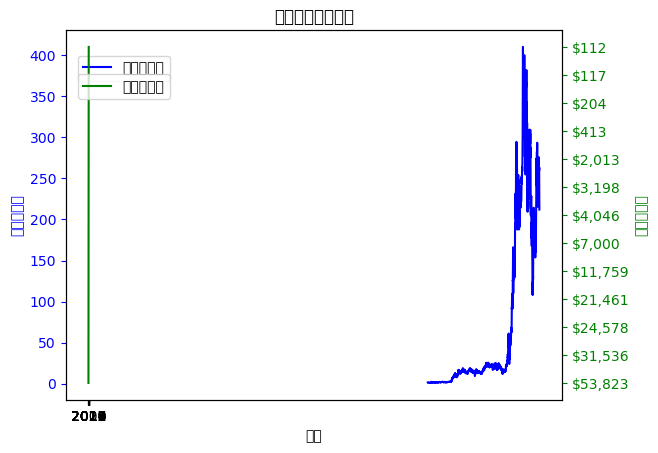

In [95]:
import matplotlib.pyplot as plt

# 定义make_graph函数
def make_graph(data, revenue, title):
    date = data['Date']
    close = data['Close']
    Tesla_revenue = revenue

    fig, ax1 = plt.subplots()

    ax1.plot(date, close, 'b', label='特斯拉股价')
    ax1.set_xlabel('日期')
    ax1.set_ylabel('特斯拉股价', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], 'g', label='特斯拉收入')
    ax2.set_ylabel('特斯拉收入', color='g')
    ax2.tick_params('y', colors='g')

    plt.title(title)

    ax1.legend(loc='upper left', bbox_to_anchor=(0.01, 0.95))
    ax2.legend(loc='upper left', bbox_to_anchor=(0.01, 0.9))

    plt.show()

# 使用特斯拉数据和收入数据调用make_graph函数
make_graph(Tesla_data, tesla_revenue, '特斯拉股价与收入')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [103]:
def make_graph(gme_data, gme_revenue, title):
    # Filter the data up to June 2021
    gme_data = gme_data[gme_data.index <= '2021-06-30']

    # Create a figure and axis
    fig, ax1 = plt.subplots()

    # Plot the stock price on the primary y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.plot(gme_data.index, gme_data['Close'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for revenue
    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue', color='tab:red')
    ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set the title
    plt.title(title)

    # Display the graph
    plt.show()

# Call the make_graph function with GameStop data and revenue data
make_graph(gme_data, gme_revenue, 'GameStop')


NameError: name 'gme_revenue' is not defined

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
